In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


In [2]:
df = pd.read_csv('../data/raw/diabetes_dataset.csv')
df.head()


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [3]:
df.shape

(100000, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,50.120410,15.604600,18.00,39.00,50.00,61.00,90.00
alcohol_consumption_per_week,100000.0,2.003670,1.417779,0.00,1.00,2.00,3.00,10.00
physical_activity_minutes_per_week,100000.0,118.911640,84.409662,0.00,57.00,100.00,160.00,833.00
diet_score,100000.0,5.994787,1.780954,0.00,4.80,6.00,7.20,10.00
sleep_hours_per_day,100000.0,6.997818,1.094622,3.00,6.30,7.00,7.70,10.00
screen_time_hours_per_day,100000.0,5.996468,2.468406,0.50,4.30,6.00,7.70,16.80
family_history_diabetes,100000.0,0.219410,0.413849,0.00,0.00,0.00,0.00,1.00
hypertension_history,100000.0,0.250800,0.433476,0.00,0.00,0.00,1.00,1.00
cardiovascular_history,100000.0,0.079200,0.270052,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,25.612653,3.586705,15.00,23.20,25.60,28.00,39.20


In [6]:
df.isna().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


In [7]:
target_col = "diagnosed_diabetes"
df[target_col].value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

In [8]:
df[target_col].value_counts(normalize=True)

diagnosed_diabetes
1    0.59998
0    0.40002
Name: proportion, dtype: float64

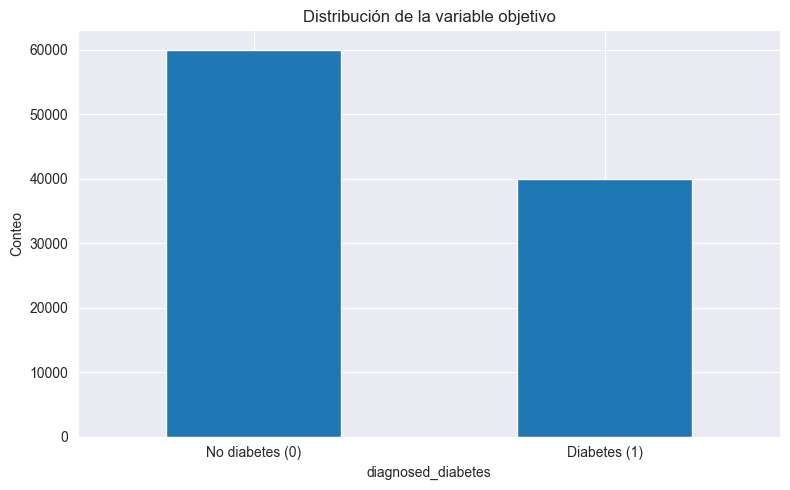

In [9]:
fig, ax = plt.subplots()
df[target_col].value_counts().plot(kind="bar", ax=ax)
ax.set_xticklabels(["No diabetes (0)", "Diabetes (1)"], rotation=0)
ax.set_ylabel("Conteo")
ax.set_title("Distribución de la variable objetivo")
plt.tight_layout()

In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_cols, categorical_cols

(['age',
  'alcohol_consumption_per_week',
  'physical_activity_minutes_per_week',
  'diet_score',
  'sleep_hours_per_day',
  'screen_time_hours_per_day',
  'family_history_diabetes',
  'hypertension_history',
  'cardiovascular_history',
  'bmi',
  'waist_to_hip_ratio',
  'systolic_bp',
  'diastolic_bp',
  'heart_rate',
  'cholesterol_total',
  'hdl_cholesterol',
  'ldl_cholesterol',
  'triglycerides',
  'glucose_fasting',
  'glucose_postprandial',
  'insulin_level',
  'hba1c',
  'diabetes_risk_score',
  'diagnosed_diabetes'],
 ['gender',
  'ethnicity',
  'education_level',
  'income_level',
  'employment_status',
  'smoking_status',
  'diabetes_stage'])

In [11]:
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,100000.0,50.120410,15.604600,18.00,39.00,50.00,61.00,90.00
alcohol_consumption_per_week,100000.0,2.003670,1.417779,0.00,1.00,2.00,3.00,10.00
physical_activity_minutes_per_week,100000.0,118.911640,84.409662,0.00,57.00,100.00,160.00,833.00
diet_score,100000.0,5.994787,1.780954,0.00,4.80,6.00,7.20,10.00
sleep_hours_per_day,100000.0,6.997818,1.094622,3.00,6.30,7.00,7.70,10.00
screen_time_hours_per_day,100000.0,5.996468,2.468406,0.50,4.30,6.00,7.70,16.80
family_history_diabetes,100000.0,0.219410,0.413849,0.00,0.00,0.00,0.00,1.00
hypertension_history,100000.0,0.250800,0.433476,0.00,0.00,0.00,1.00,1.00
cardiovascular_history,100000.0,0.079200,0.270052,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,25.612653,3.586705,15.00,23.20,25.60,28.00,39.20


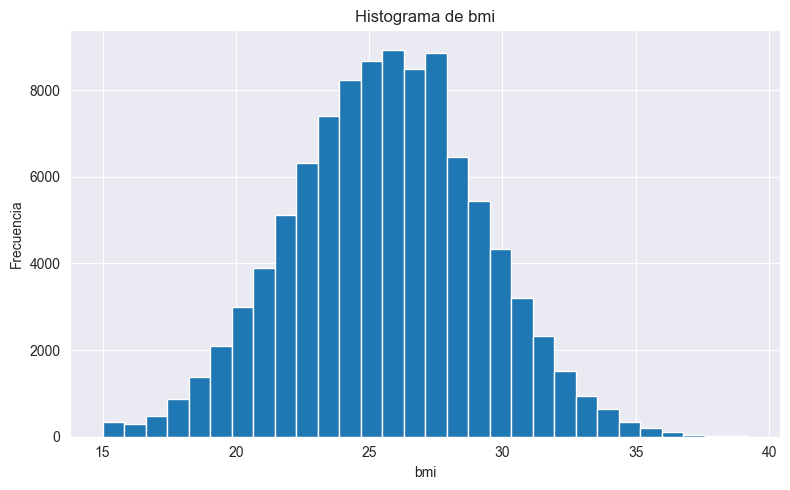

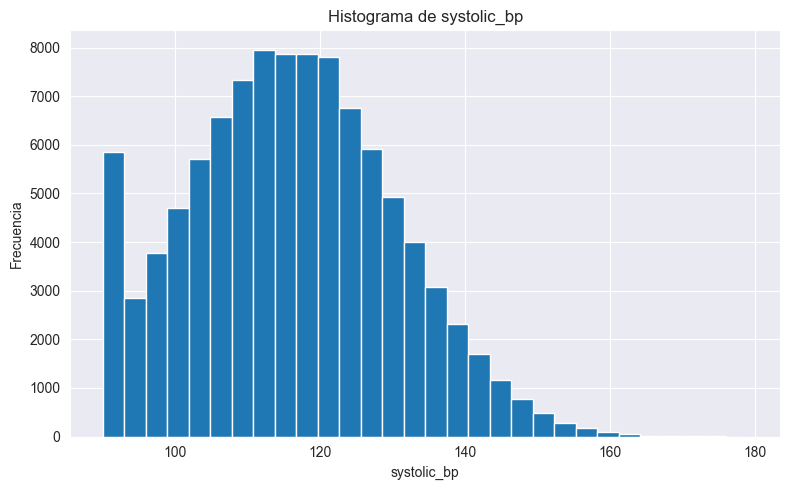

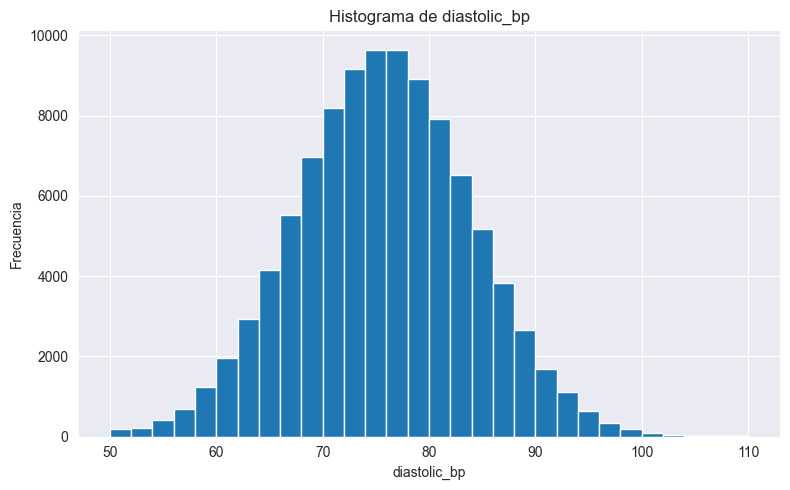

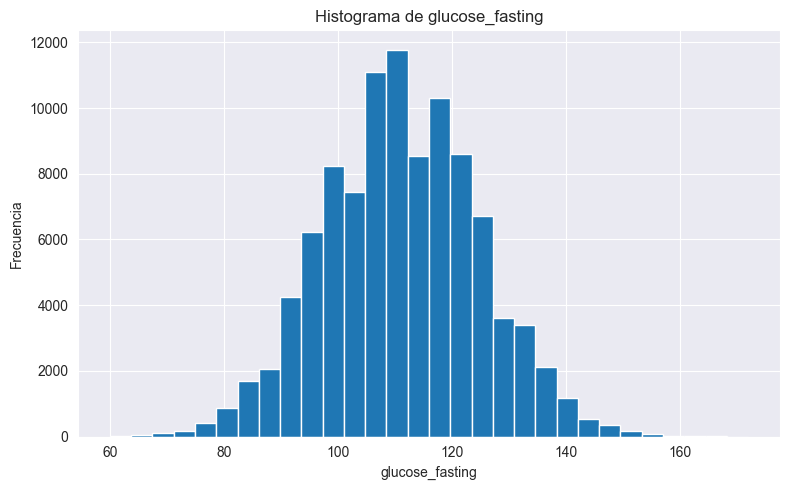

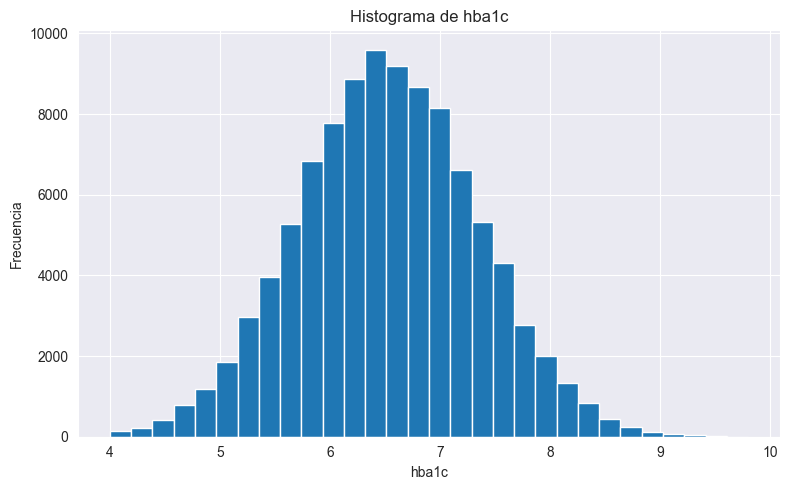

In [12]:
clinicas = ["bmi", "systolic_bp", "diastolic_bp", "glucose_fasting", "hba1c"]

for col in clinicas:
    fig, ax = plt.subplots()
    df[col].hist(bins=30, ax=ax)
    ax.set_title(f"Histograma de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    plt.tight_layout()

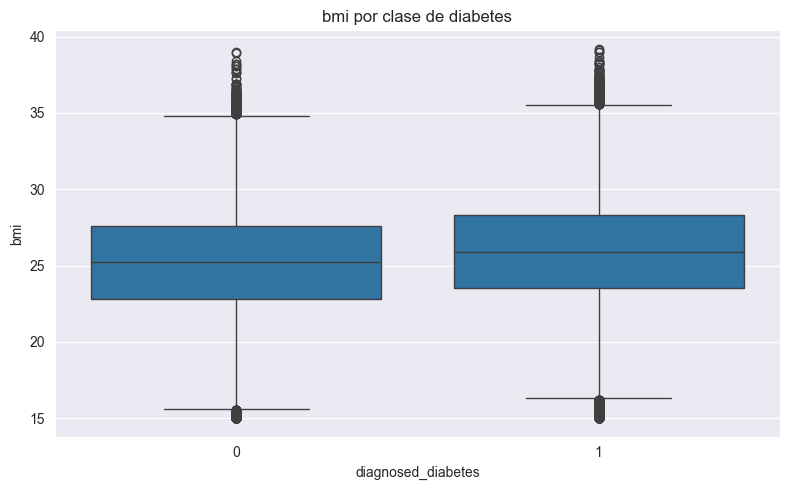

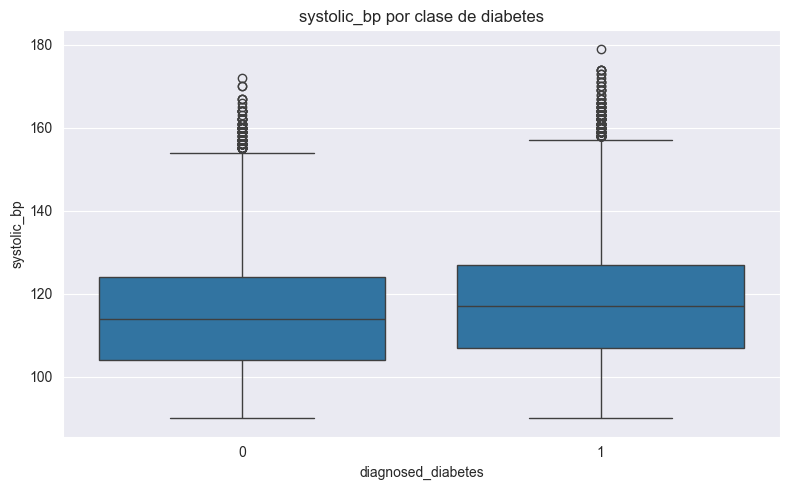

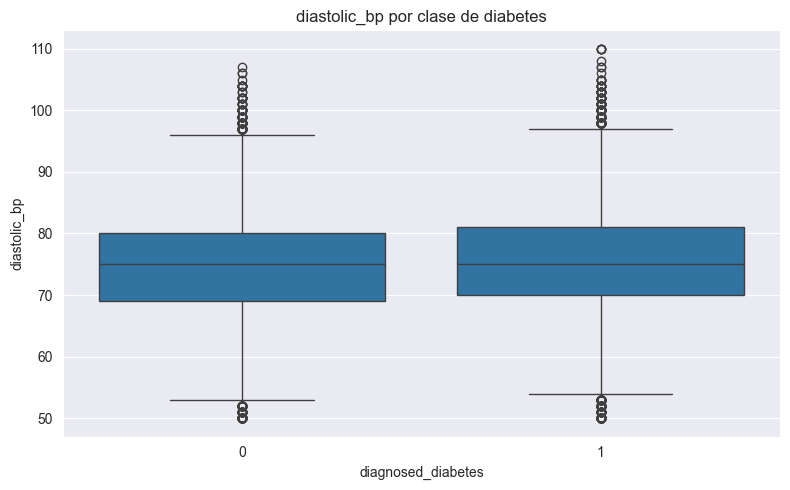

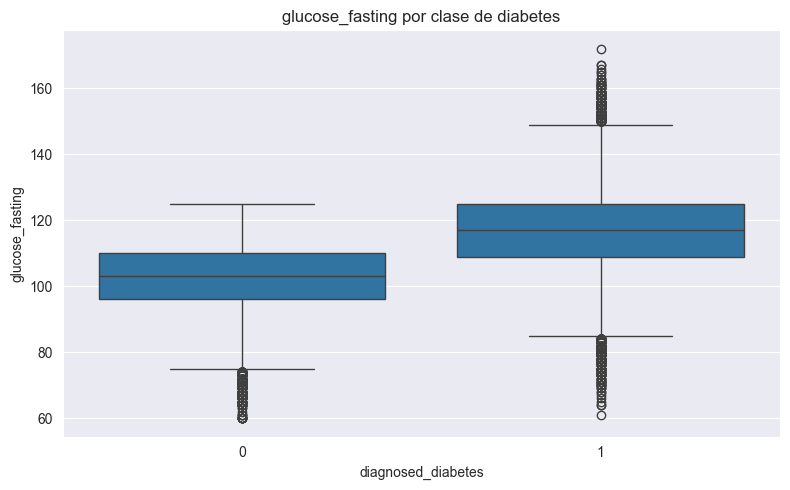

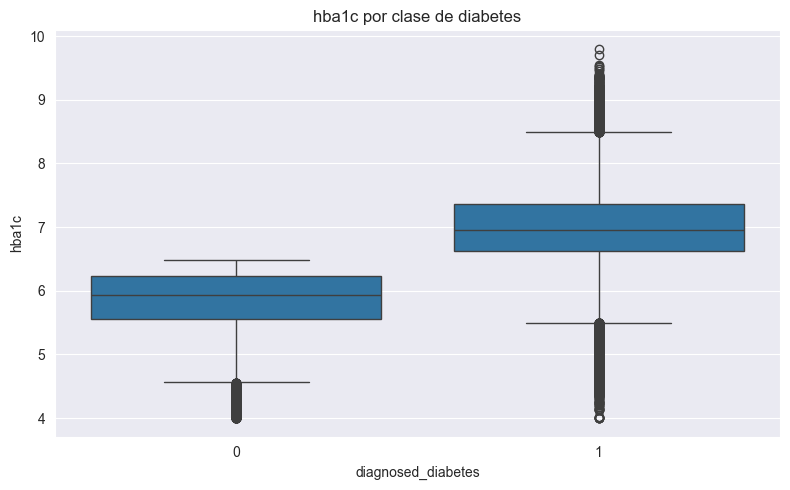

In [13]:
for col in clinicas:
    fig, ax = plt.subplots()
    sns.boxplot(
        data=df,
        x=target_col,
        y=col,
        ax=ax,
    )
    ax.set_title(f"{col} por clase de diabetes")
    ax.set_xlabel("diagnosed_diabetes")
    plt.tight_layout()

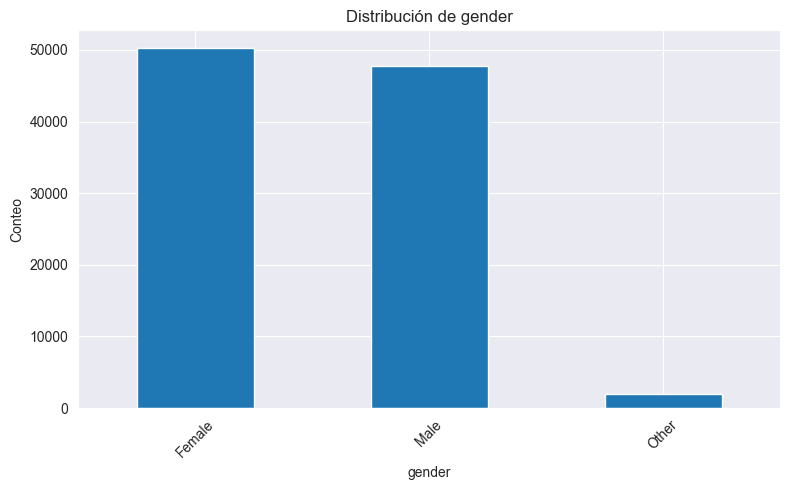

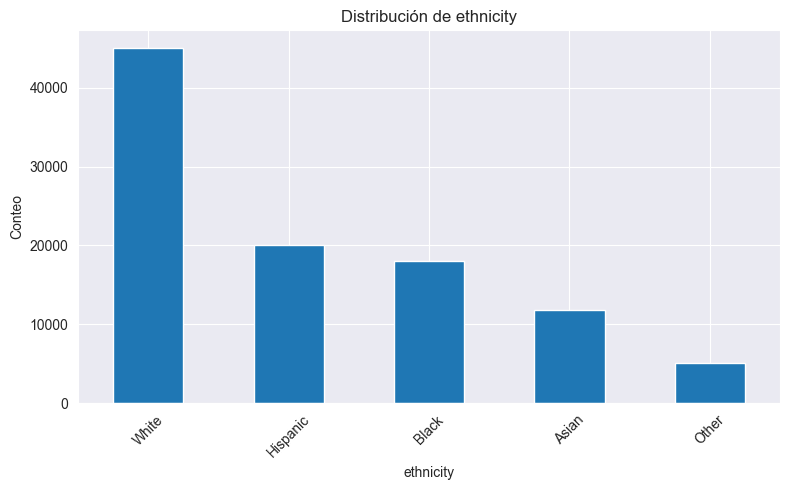

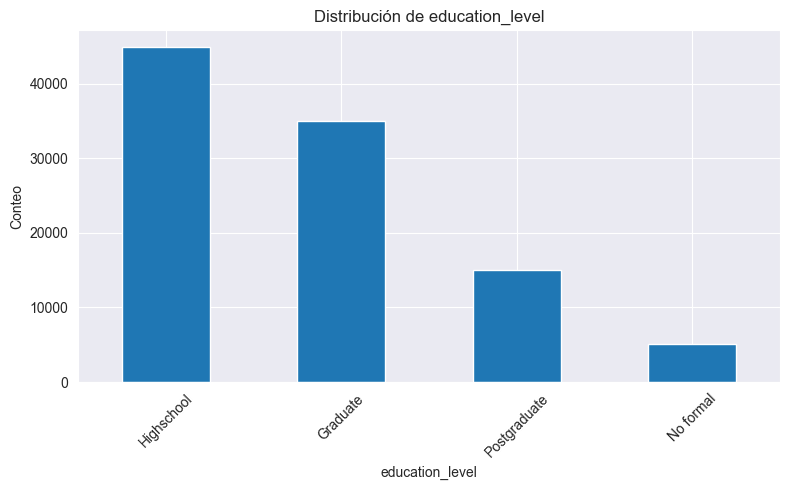

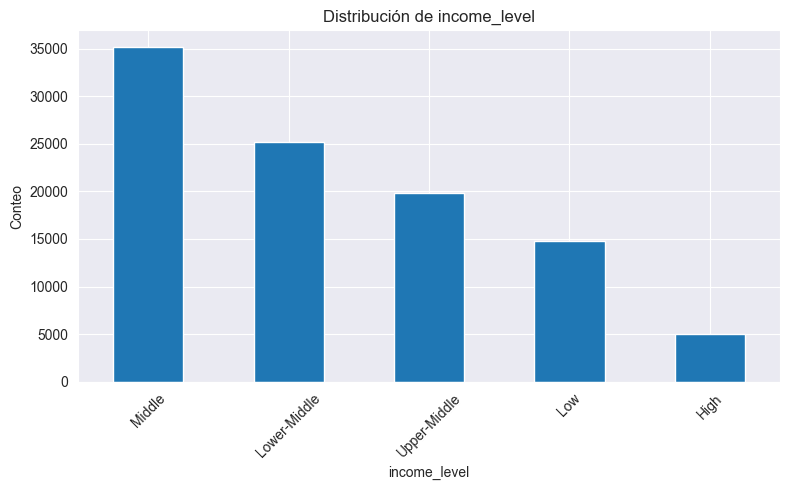

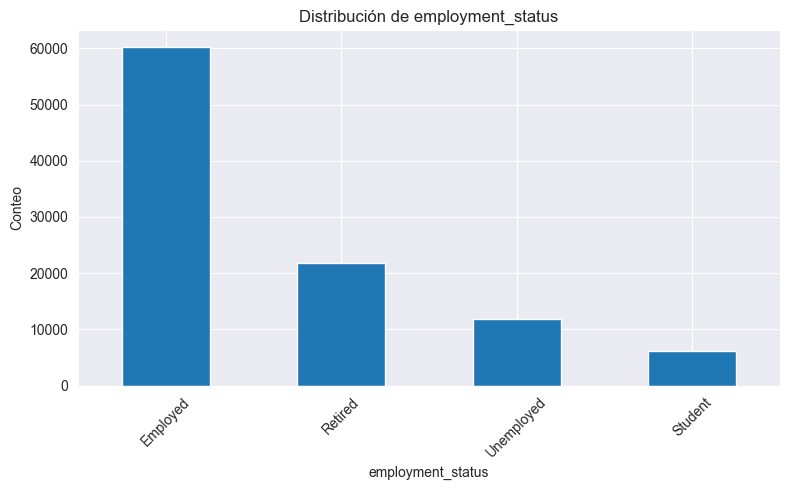

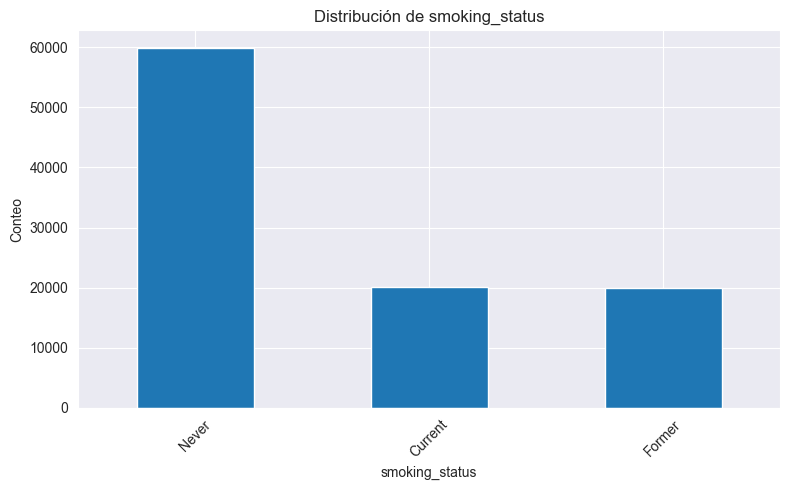

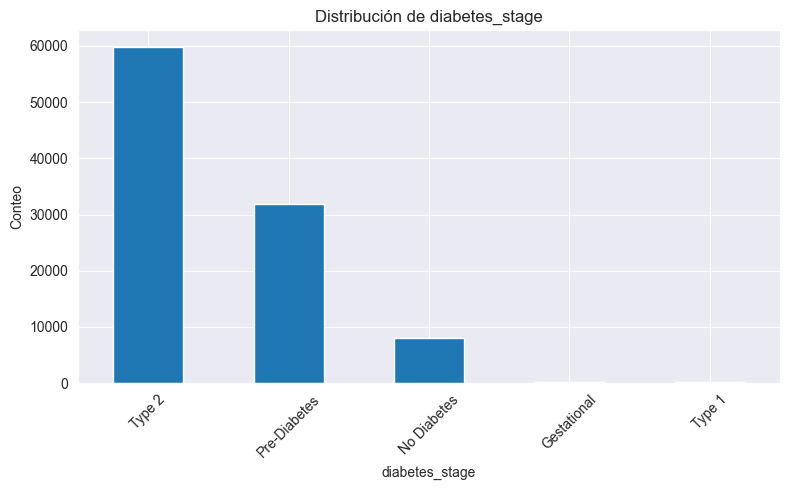

In [14]:
for col in categorical_cols:
    fig, ax = plt.subplots()
    df[col].value_counts().plot(kind="bar", ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.tight_layout()

diagnosed_diabetes,0,1
gender,,
Female,0.401545,0.598455
Male,0.399343,0.600657
Other,0.378043,0.621957


diagnosed_diabetes,0,1
diabetes_stage,,
Gestational,0.431655,0.568345
No Diabetes,1.000000,0.000000
Pre-Diabetes,1.000000,0.000000
Type 1,0.459016,0.540984
Type 2,0.000000,1.000000


diagnosed_diabetes,0,1
smoking_status,,
Current,0.399931,0.600069
Former,0.398881,0.601119
Never,0.400431,0.599569


diagnosed_diabetes,0,1
ethnicity,,
Asian,0.399241,0.600759
Black,0.398588,0.601412
Hispanic,0.406059,0.593941
Other,0.392355,0.607645
White,0.398960,0.601040


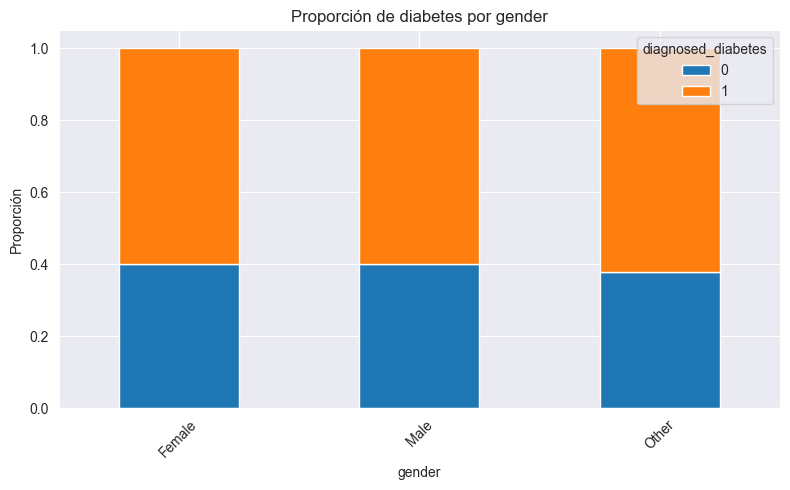

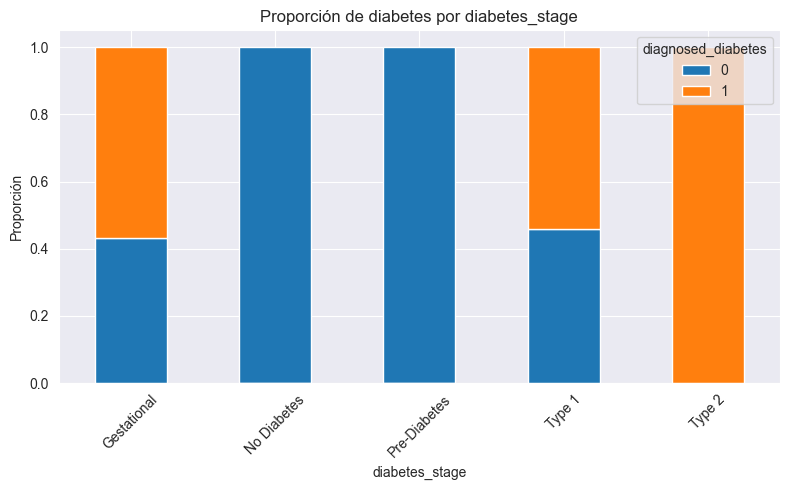

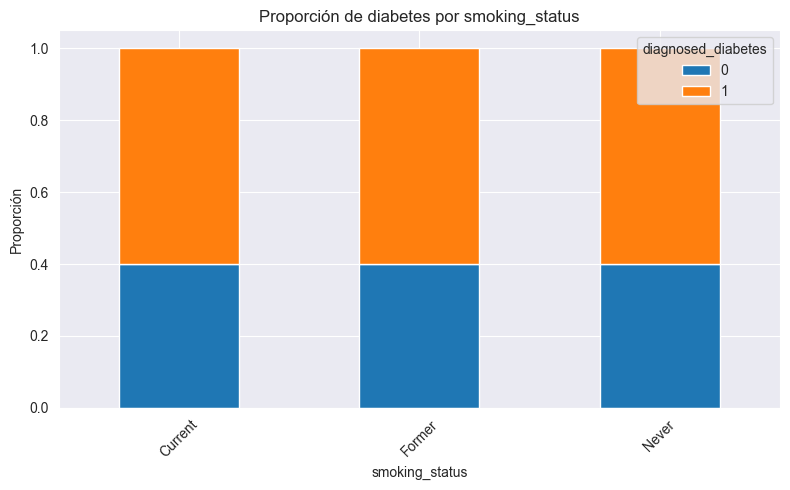

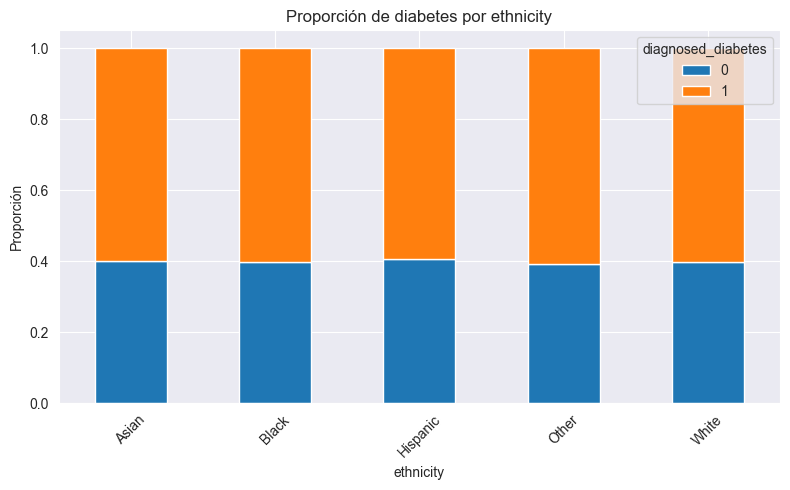

In [15]:
for col in ["gender", "diabetes_stage", "smoking_status", "ethnicity"]:
    ct = pd.crosstab(df[col], df[target_col], normalize="index")
    display(ct)
    fig, ax = plt.subplots()
    ct.plot(kind="bar", stacked=True, ax=ax)
    ax.set_title(f"Proporción de diabetes por {col}")
    ax.set_ylabel("Proporción")
    plt.xticks(rotation=45)
    plt.tight_layout()

In [16]:
corr = df[numeric_cols].corr()
corr.shape

(24, 24)

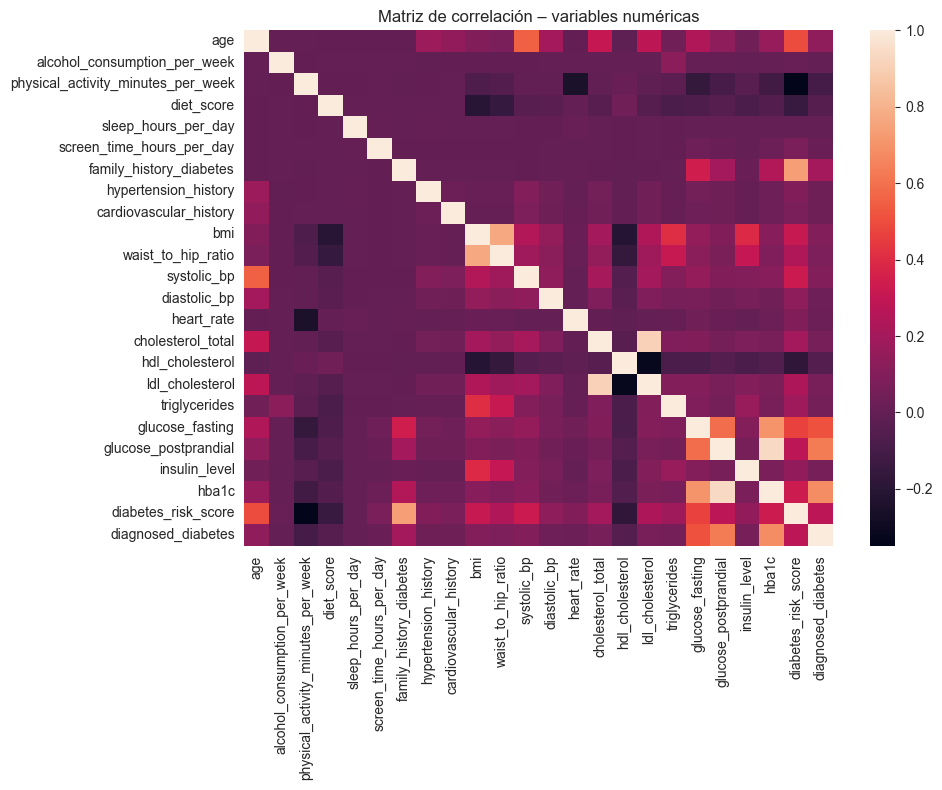

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, ax=ax)
ax.set_title("Matriz de correlación – variables numéricas")
plt.tight_layout()

In [18]:
target_corr = corr[target_col].drop(target_col).sort_values(ascending=False)
target_corr

hba1c                                 0.679397
glucose_postprandial                  0.629832
glucose_fasting                       0.510919
diabetes_risk_score                   0.277300
family_history_diabetes               0.197926
age                                   0.137713
bmi                                   0.097057
systolic_bp                           0.095481
waist_to_hip_ratio                    0.078918
ldl_cholesterol                       0.067475
cholesterol_total                     0.058173
insulin_level                         0.057715
triglycerides                         0.056230
diastolic_bp                          0.035619
cardiovascular_history                0.029793
hypertension_history                  0.027524
heart_rate                            0.022785
screen_time_hours_per_day             0.018127
alcohol_consumption_per_week          0.000760
sleep_hours_per_day                  -0.000399
diet_score                           -0.044298
hdl_cholester

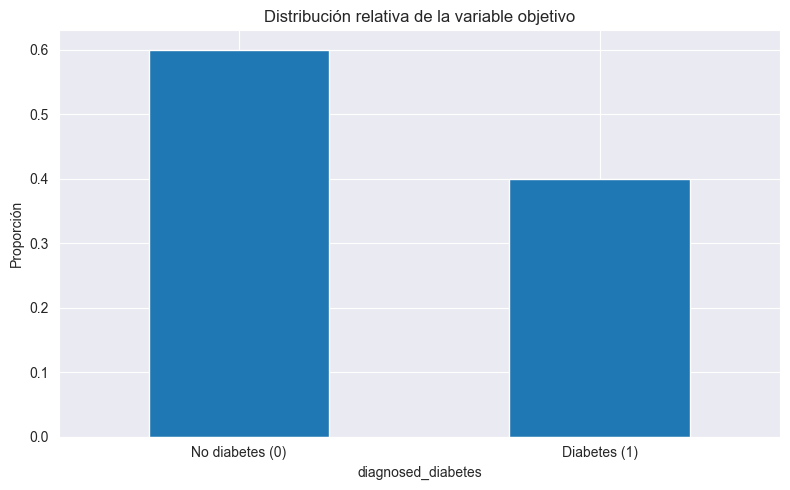

In [19]:
fig, ax = plt.subplots()
df[target_col].value_counts(normalize=True).plot(kind="bar", ax=ax)
ax.set_xticklabels(["No diabetes (0)", "Diabetes (1)"], rotation=0)
ax.set_ylabel("Proporción")
ax.set_title("Distribución relativa de la variable objetivo")
plt.tight_layout()

In [21]:
import pandas as pd
import numpy as np

def clean_diabetes_dataset(df, save_path=None):
    """
    Limpia el dataset de Diabetes Health Indicators.

    Pasos:
    1. Estandariza strings en columnas categóricas.
    2. Convierte columnas binarias a 0/1.
    3. Winsoriza outliers en variables clínicas.
    4. (Opcional) Guarda el dataset limpio en CSV.

    Parámetros:
    ----------
    df : pd.DataFrame
        Dataset original.
    save_path : str or Path, opcional
        Ruta donde guardar el CSV limpio.

    Retorna:
    --------
    df : pd.DataFrame
        Dataset limpio.
    """

    # ==========================
    # 1. Estandarizar categóricas
    # ==========================
    cat_cols = df.select_dtypes(include="object").columns
    for col in cat_cols:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(r"\s+", " ", regex=True)
            .str.title()
        )

    # ==========================
    # 2. Asegurar binarias 0/1
    # ==========================
    binary_cols = [
        "family_history_diabetes",
        "hypertension_history",
        "cardiovascular_history",
    ]
    for col in binary_cols:
        if col in df.columns:
            df[col] = df[col].replace({"Yes":1, "No":0}).astype(float)

    # ==========================
    # 3. Winsorización de outliers
    # ==========================
    def winsorize(series, min_pct=0.01, max_pct=0.99):
        low = series.quantile(min_pct)
        high = series.quantile(max_pct)
        return np.clip(series, low, high)

    cols_outliers = [
        "bmi",
        "systolic_bp",
        "diastolic_bp",
        "glucose_fasting",
        "glucose_postprandial",
        "triglycerides",
        "hba1c",
        "insulin_level",
    ]

    for col in cols_outliers:
        if col in df.columns:
            df[col] = winsorize(df[col])


    return df


In [22]:
df = pd.read_csv("../data/raw/diabetes_dataset.csv")

df_clean = clean_diabetes_dataset(
    df
)

In [23]:
df_clean

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,233,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,233,5.28,8.42,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No Formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0
